In [260]:
import numpy as np 
import matplotlib.pyplot as plt
import scienceplots

from scipy.optimize import  curve_fit
from sklearn.metrics import r2_score

plt.style.use(['science', 'notebook', 'grid'])

In [261]:
N = 130
R = 30.1/2 * 1e-2
R_err = 0.2*1e-2

In [262]:
z = np.array([20,22,24,26,28,30,18,16,14,12,10]) * 1e-2 - 20*1e-2 
z_err = 0.1*1e-2

V_1 = -np.array([222,221,219,214,205,188,222,221,218,209,191]) *1e-3
V_1_fundo = 0.2*1e-3
V_1 = -(V_1 - V_1_fundo)
V_1_err = 1 *1e-3

V_2 = -np.array([7.5,-23.4,-52.6,-83.6,-95,-99.6, 40.5,73.6,96.1,108.8,112.5]) *1e-3
V_2_fundo = 0.5*1e-3
V_2 = (V_2 - V_2_fundo)
V_2_err = 0.2 * 1e-3



In [263]:
A = 0.003472442866550257
A_err = 2.6927087730399573*1e-05

B_1 = V_1 * A
B_1_err = A*V_1_err + np.abs(V_1)*A_err

B_2 = V_2 * A
B_2_err = A*V_2_err + np.abs(V_2)*A_err

In [264]:
mu = 4*np.pi *1e-7
I = 0.99

def B_1_t(z):
    return mu * I * N *R**2 / 2 * (1/(((z-R/2)**2 + R**2)**(3/2)) +1/(((z+R/2)**2 + R**2)**(3/2)) )

def B_2_t(z):
    return mu * I * N *R**2 / 2 * (1/(((z-R/2)**2 + R**2)**(3/2)) - 1/(((z+R/2)**2 + R**2)**(3/2)) )

z_t = np.linspace(min(z), max(z), 500)

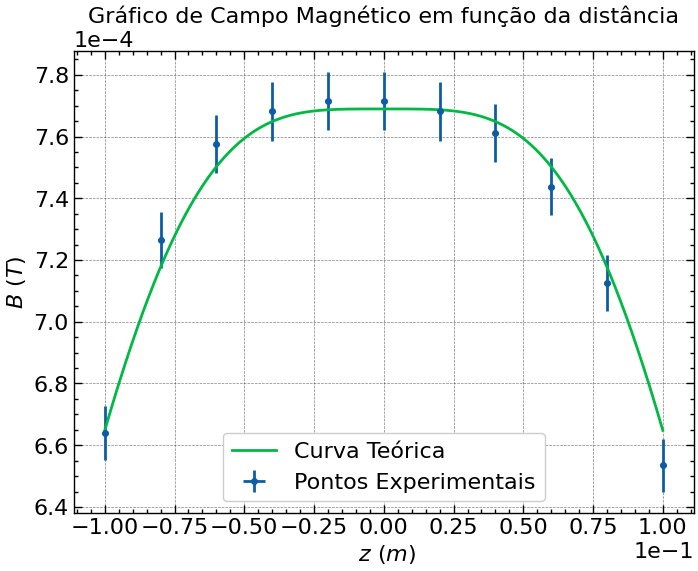

In [265]:
plt.errorbar(z, B_1, xerr=z_err, yerr=B_1_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(z_t, B_1_t(z_t), label = 'Curva Teórica')

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.xlabel(r"$\ z \ (m)$")
plt.ylabel(r"$B \ (T)$")
plt.title("Gráfico de Campo Magnético em função da distância")

plt.legend()

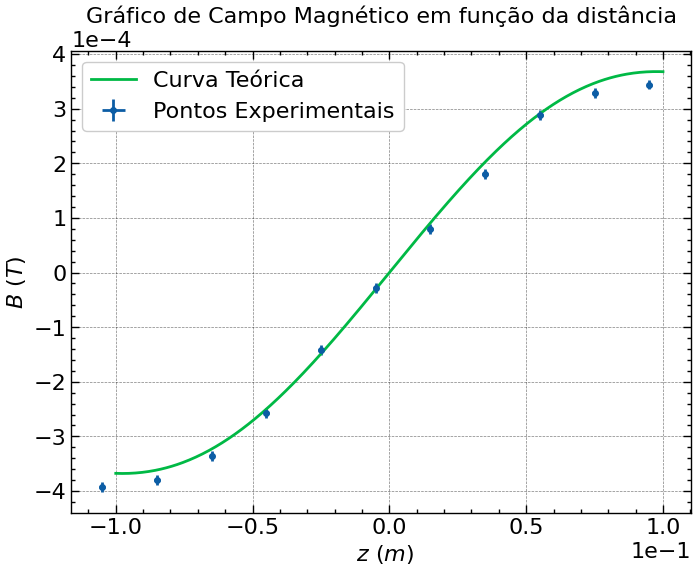

In [266]:
z = z - 0.5*1e-2

plt.errorbar(z, B_2, xerr=z_err, yerr=B_1_err, marker = 'o',ms = 4, ls = '', label = 'Pontos Experimentais')
plt.plot(z_t, B_2_t(z_t), label = 'Curva Teórica')

plt.gca().ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
plt.gca().ticklabel_format(axis='x', style='sci', scilimits=(0, 0))

plt.xlabel(r"$\ z \ (m)$")
plt.ylabel(r"$B \ (T)$")
plt.title("Gráfico de Campo Magnético em função da distância")

plt.legend()